## TMDB Score Prediction and Movie Recommendation

![](https://midasmedia.co.uk//media/2014/03/quality-score-grades-1-10.png)

This notebook will be completely different from my previous notebooks which were completely EDA's(my favorite :p). In this notebook I will try to predict the TMDB score for a movie. Initially I was planning to do EDA with this dataset, but one of my friend and fellow Kaggler **[Mhamed Jabri](https://www.kaggle.com/mhajabri/)** recommended me to do and try something  different, and I would like to thank him a lot as it helped me learn new things.

Coming to the dataset, it has informatio about 5000 movies, split into 2 csv files.

 - ** *tmdb_5000_movies.csv:* ** Contains information like the **score,title,date_of_release,genres,etc.**

 - ** *tmdb_5000_credits.csv:* ** Contains information of the **cast and crew** for each movie.

The main problem with this dataset is the **.json format**. Many columns in the dataset are in json format, therefore cleaning the dataset was the main challenge. For people who don't know about JSON(JavaScript Object Notation), it is basically a syntax for storing and exchanging data between two computers. It is mainly in a **key:value** format, and is embedded into a string. 

In this notebook, I will try to predict the score or the rating of a movie. We know that the score of a movie depends on various factors like the genre, or the actor working in the film and mainly the director of the film. Considering all such factors, I will try to build a simple score predictor for this dataset. 

I hope this notebook helps other fellow kagglers in learning something new. **Do Upvote** is you find this notebook useful.

### Import Required Packges

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import numpy as np
import json
import warnings
warnings.filterwarnings('ignore')
import base64
import io
from scipy.misc import imread
import codecs
from IPython.display import HTML

### Importing the Data
Bharat Edit: Changed filepath to work with my path

In [2]:
movies=pd.read_csv('./movie_data/tmdb_5000_movies.csv')
mov=pd.read_csv('./movie_data/tmdb_5000_credits.csv')

In [3]:
movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


Checking the dataset, we can see that **genres,keywords,production_companies,production_countries,spoken_languages** are in the json format. Similarly in the other csv file, **cast and crew** are in the json format. Now lets convert these columns into a format that can be easily read and interpreted. We will convert them into strings and later convert them into lists for easier interpretation. 

As stated earlier ,the JSON format is like a **dictionary(key:value)** pair embedded in a string. Now parsing the data is a pain and time consuming. Luckily this dataset doesn't have that complicated structure. A basic similarity between the columns is that they have a **name** key, which contains the values that we need to collect. The easiest way to do so parse through the JSON and check for the name key on each row. Once the name key is found, store the value of it into a list and replace the JSON with the list.

But we cannot directly parse this JSON as it has to decoded first. For this we use the **json.loads()** method, which decodes it into a list. We can then parse through this list to find the desired values. Lets look at the proper syntax below.

#### Converting the json into strings

In [4]:
# changing the genres column from json to string
movies['genres']=movies['genres'].apply(json.loads)
for index,i in zip(movies.index,movies['genres']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))# the key 'name' contains the name of the genre
    movies.loc[index,'genres']=str(list1)
    
# changing the keywords column from json to string
movies['keywords']=movies['keywords'].apply(json.loads)
for index,i in zip(movies.index,movies['keywords']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'keywords']=str(list1)
    
## changing the production_companies column from json to string
movies['production_companies']=movies['production_companies'].apply(json.loads)
for index,i in zip(movies.index,movies['production_companies']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'production_companies']=str(list1)
    
# changing the production_countries column from json to string    
movies['production_countries']=movies['production_countries'].apply(json.loads)
for index,i in zip(movies.index,movies['production_countries']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'production_countries']=str(list1)
    
# changing the cast column from json to string
mov['cast']=mov['cast'].apply(json.loads)
for index,i in zip(mov.index,mov['cast']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))
    mov.loc[index,'cast']=str(list1)

# changing the crew column from json to string    
mov['crew']=mov['crew'].apply(json.loads)
def director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
mov['crew']=mov['crew'].apply(director)
mov.rename(columns={'crew':'director'},inplace=True)

In [5]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",http://www.avatarmovie.com/,19995,"['culture clash', 'future', 'space war', 'spac...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"['Ingenious Film Partners', 'Twentieth Century...","['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"['Adventure', 'Fantasy', 'Action']",http://disney.go.com/disneypictures/pirates/,285,"['ocean', 'drug abuse', 'exotic island', 'east...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"['Walt Disney Pictures', 'Jerry Bruckheimer Fi...",['United States of America'],2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


So now we have our dataset cleaned. Lets start building our score prediction system.

In [6]:
movies=movies.merge(mov,left_on='id',right_on='movie_id',how='left')# merging the two csv files

In [7]:
movies=movies[['id','original_title','genres','cast','vote_average','director','keywords']]

As said earlier, the json stuff is now in string format. In the next step, we will convert it into list format. The reason for doing so is that a single movie has many genres, and we need to get each of them individually. So a list format is used for such an interpretation.

#### Working with the genres column 

In [8]:
movies['genres']=movies['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['genres']=movies['genres'].str.split(',')

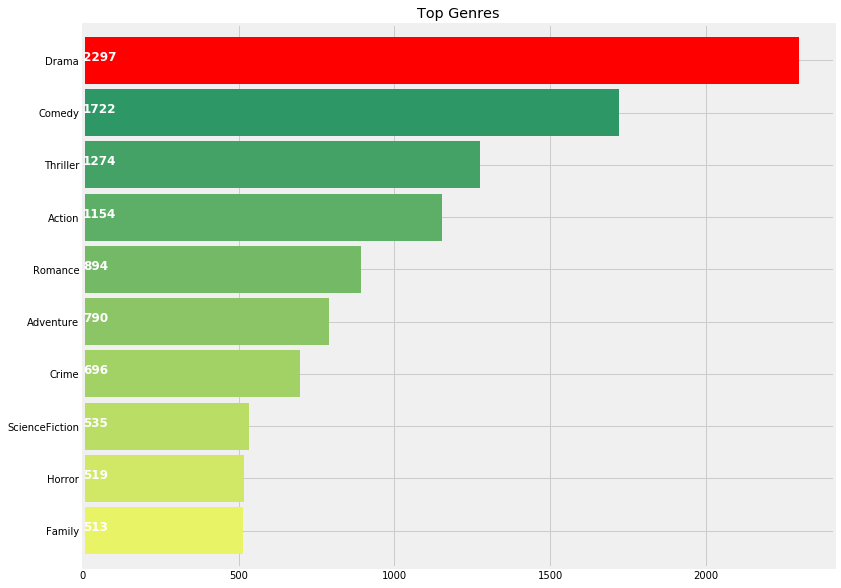

In [9]:
plt.subplots(figsize=(12,10))
list1=[]
for i in movies['genres']:
    list1.extend(i)
ax=pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('summer_r',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
ax.patches[9].set_facecolor('r')
plt.title('Top Genres')
plt.show()

Drama looks to be the most popular genre followed by Comedy.

In [10]:
for i,j in zip(movies['genres'],movies.index):
    list2=[]
    list2=i
    list2.sort()
    movies.loc[j,'genres']=str(list2)
movies['genres']=movies['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['genres']=movies['genres'].str.split(',')

Now lets generate a list 'genreList' with all possible unique genres mentioned in the dataset.

In [11]:
genreList = []
for index, row in movies.iterrows():
    genres = row["genres"]
    
    for genre in genres:
        if genre not in genreList:
            genreList.append(genre)

In [12]:
genreList[:10] #now we have a list with unique genres

['Action',
 'Adventure',
 'Fantasy',
 'ScienceFiction',
 'Crime',
 'Drama',
 'Thriller',
 'Animation',
 'Family',
 'Western']

'genreList' will now hold all the genres. But how do we come to know about the genres each movie is falls into. Now some movies will be 'Action', some will be 'Action,Adventure',etc. We need to classify the movies according to their genres.

Lets create a new column in the dataframe that will hold the binary values whether a genre is present or not in it. First lets create a method which will return back a list of binary values for the genres of each movie. The 'genreList' will be useful now to compare against the values.

Lets say for example we have 20 unique genres in the list. Thus the below function will return a list with 20 elements,which will be either 0 or 1. Now for example we have a Movie which has **genre='Action'**, then the new column will hold
**[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]**.

Similarly for **'Action,Adventure' we will have, [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]**. Converting the genres into such a list of binary values will help in easily classfying the movies by their genres.

We will follow the same notations for other features like the cast, director and the keywords.

In [13]:
def binary(genre_list):
    binaryList = []
    
    for genre in genreList:
        if genre in genre_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [14]:
movies['genres_bin'] = movies['genres'].apply(lambda x: binary(x))

In [15]:
movies['genres_bin'].head(4)

0    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: genres_bin, dtype: object

So now the new column is ready. Lets do the same thing for the other columns that we need for the prediction system i.e we will create a binary column for the **columns: ['cast','director','keywords']**.

#### Working with the Cast Column

When I initially created the list of all the cast, it had around 50k unique values, as many movies have entries for about 15-20 actors. But do we need all of them?? The answer is **No**. We just need the actors who have the highest contribution in the movie. For eg: **The Dark Knight** franchise has many actors involved in the movie. But we will select only the main actors like **Christian Bale, Micheal Caine, Heath Ledger**. I have selected the main 4 actors from each movie.

One question that may arise in your mind is that how do you determine the importance of the actor in the movie. Luckily,the the sequence of the actors in the JSON format is according to the actor's importance.  

In [16]:
movies['cast']=movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace('"','')
movies['cast']=movies['cast'].str.split(',')

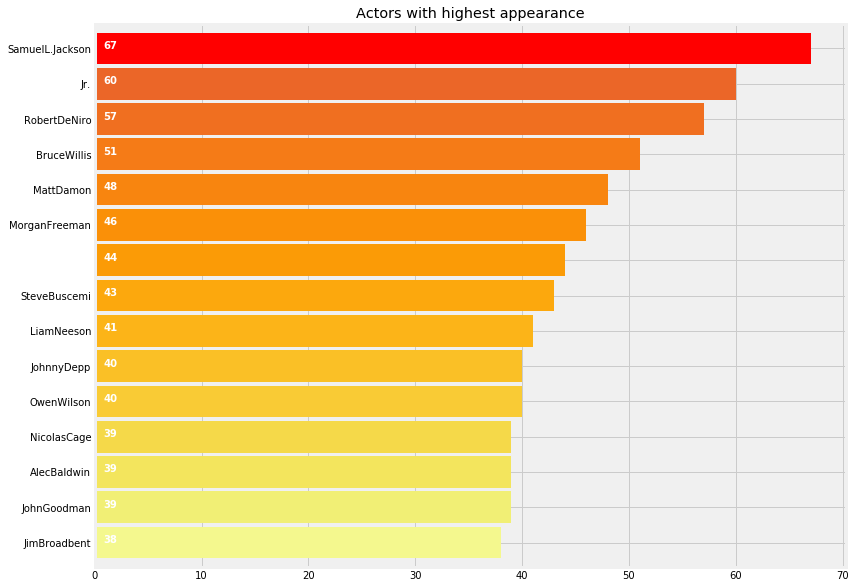

In [17]:
plt.subplots(figsize=(12,10))
list1=[]
for i in movies['cast']:
    list1.extend(i)
ax=pd.Series(list1).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('inferno_r',40))
for i, v in enumerate(pd.Series(list1).value_counts()[:15].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=10,color='white',weight='bold')
plt.title('Actors with highest appearance')
ax.patches[14].set_facecolor('r')
plt.show()

**Samuel Jackson aka Nick Fury** from avengers has appeared in maximum movies. I initally thought that Morgan Freeman might be the actor with maximum movies, but Data wins over assumptions..!!

In [18]:
for i,j in zip(movies['cast'],movies.index):
    list2=[]
    list2=i[:4]
    movies.loc[j,'cast']=str(list2)
movies['cast']=movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['cast']=movies['cast'].str.split(',')
for i,j in zip(movies['cast'],movies.index):
    list2=[]
    list2=i
    list2.sort()
    movies.loc[j,'cast']=str(list2)
movies['cast']=movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['cast']=movies['cast'].str.split(',')

In [19]:
castList = []
for index, row in movies.iterrows():
    cast = row["cast"]
    
    for i in cast:
        if i not in castList:
            castList.append(i)

In [20]:
def binary(cast_list):
    binaryList = []
    
    for genre in castList:
        if genre in cast_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [21]:
movies['cast_bin'] = movies['cast'].apply(lambda x: binary(x))

In [22]:
movies['cast_bin'].head(2)

0    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...
Name: cast_bin, dtype: object

Above I have created a new column containing the binary list for the actors in the movie.

#### Working with the director column

In [23]:
def xstr(s):
    if s is None:
        return ''
    return str(s)
movies['director']=movies['director'].apply(xstr)

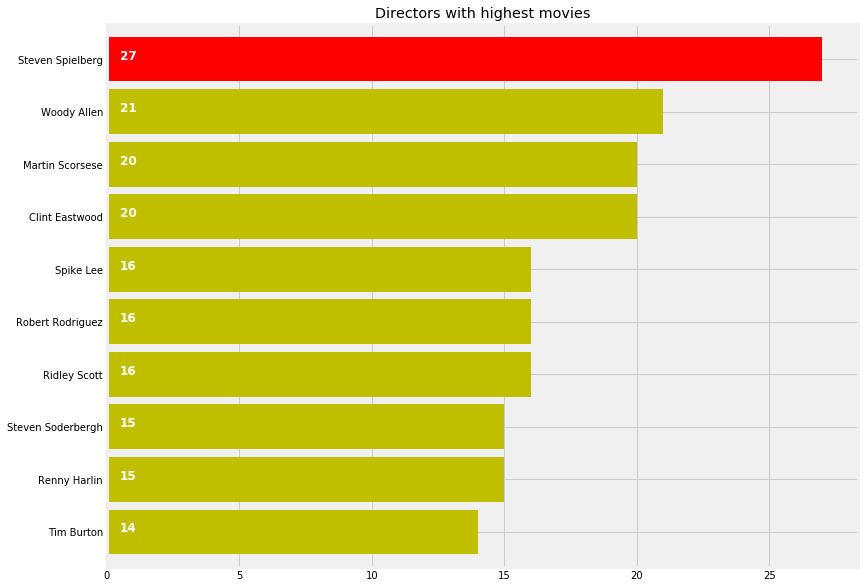

In [24]:
plt.subplots(figsize=(12,10))
ax=movies[movies['director']!=''].director.value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.85,color='y')
for i, v in enumerate(movies[movies['director']!=''].director.value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.5, i, v,fontsize=12,color='white',weight='bold')
ax.patches[9].set_facecolor('r')
plt.title('Directors with highest movies')
plt.show()

In [25]:
directorList=[]
for i in movies['director']:
    if i not in directorList:
        directorList.append(i)

In [26]:
def binary(director_list):
    binaryList = []
    
    for direct in directorList:
        if direct in director_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [27]:
movies['director_bin'] = movies['director'].apply(lambda x: binary(x))

#### Working with the keywords column

The keywords or tags contain a lot of information about the movie, and it is a key feature in finding similar movies. For eg: Movies like **"Avengers" and "Ant-man"** may have common keywords like **superheroes or Marvel**.

**Bharat Edit: Commented out portions using wordcloud. Not necessary, and not compatible with currently installed modules**

In [33]:
#mask=b'iVBORw0KGgoAAAANSUhEUgAAAgAAAAIACAYAAAD0eNT6AAAACXBIWXMAAAsTAAALEwEAmpwYAAAKT2lDQ1BQaG90b3Nob3AgSUNDIHByb2ZpbGUAAHjanVNnVFPpFj333vRCS4iAlEtvUhUIIFJCi4AUkSYqIQkQSoghodkVUcERRUUEG8igiAOOjoCMFVEsDIoK2AfkIaKOg6OIisr74Xuja9a89+bN/rXXPues852zzwfACAyWSDNRNYAMqUIeEeCDx8TG4eQuQIEKJHAAEAizZCFz/SMBAPh+PDwrIsAHvgABeNMLCADATZvAMByH/w/qQplcAYCEAcB0kThLCIAUAEB6jkKmAEBGAYCdmCZTAKAEAGDLY2LjAFAtAGAnf+bTAICd+Jl7AQBblCEVAaCRACATZYhEAGg7AKzPVopFAFgwABRmS8Q5ANgtADBJV2ZIALC3AMDOEAuyAAgMADBRiIUpAAR7AGDIIyN4AISZABRG8lc88SuuEOcqAAB4mbI8uSQ5RYFbCC1xB1dXLh4ozkkXKxQ2YQJhmkAuwnmZGTKBNA/g88wAAKCRFRHgg/P9eM4Ors7ONo62Dl8t6r8G/yJiYuP+5c+rcEAAAOF0ftH+LC+zGoA7BoBt/qIl7gRoXgugdfeLZrIPQLUAoOnaV/Nw+H48PEWhkLnZ2eXk5NhKxEJbYcpXff5nwl/AV/1s+X48/Pf14L7iJIEyXYFHBPjgwsz0TKUcz5IJhGLc5o9H/LcL//wd0yLESWK5WCoU41EScY5EmozzMqUiiUKSKcUl0v9k4t8s+wM+3zUAsGo+AXuRLahdYwP2SycQWHTA4vcAAPK7b8HUKAgDgGiD4c93/+8//UegJQCAZkmScQAAXkQkLlTKsz/HCAAARKCBKrBBG/TBGCzABhzBBdzBC/xgNoRCJMTCQhBCCmSAHHJgKayCQiiGzbAdKmAv1EAdNMBRaIaTcA4uwlW4Dj1wD/phCJ7BKLyBCQRByAgTYSHaiAFiilgjjggXmYX4IcFIBBKLJCDJiBRRIkuRNUgxUopUIFVIHfI9cgI5h1xGupE7yAAygvyGvEcxlIGyUT3UDLVDuag3GoRGogvQZHQxmo8WoJvQcrQaPYw2oefQq2gP2o8+Q8cwwOgYBzPEbDAuxsNCsTgsCZNjy7EirAyrxhqwVqwDu4n1Y8+xdwQSgUXACTYEd0IgYR5BSFhMWE7YSKggHCQ0EdoJNwkDhFHCJyKTqEu0JroR+cQYYjIxh1hILCPWEo8TLxB7iEPENyQSiUMyJ7mQAkmxpFTSEtJG0m5SI+ksqZs0SBojk8naZGuyBzmULCAryIXkneTD5DPkG+Qh8lsKnWJAcaT4U+IoUspqShnlEOU05QZlmDJBVaOaUt2ooVQRNY9aQq2htlKvUYeoEzR1mjnNgxZJS6WtopXTGmgXaPdpr+h0uhHdlR5Ol9BX0svpR+iX6AP0dwwNhhWDx4hnKBmbGAcYZxl3GK+YTKYZ04sZx1QwNzHrmOeZD5lvVVgqtip8FZHKCpVKlSaVGyovVKmqpqreqgtV81XLVI+pXlN9rkZVM1PjqQnUlqtVqp1Q61MbU2epO6iHqmeob1Q/pH5Z/YkGWcNMw09DpFGgsV/jvMYgC2MZs3gsIWsNq4Z1gTXEJrHN2Xx2KruY/R27iz2qqaE5QzNKM1ezUvOUZj8H45hx+Jx0TgnnKKeX836K3hTvKeIpG6Y0TLkxZVxrqpaXllirSKtRq0frvTau7aedpr1Fu1n7gQ5Bx0onXCdHZ4/OBZ3nU9lT3acKpxZNPTr1ri6qa6UbobtEd79up+6Ynr5egJ5Mb6feeb3n+hx9L/1U/W36p/VHDFgGswwkBtsMzhg8xTVxbzwdL8fb8VFDXcNAQ6VhlWGX4YSRudE8o9VGjUYPjGnGXOMk423GbcajJgYmISZLTepN7ppSTbmmKaY7TDtMx83MzaLN1pk1mz0x1zLnm+eb15vft2BaeFostqi2uGVJsuRaplnutrxuhVo5WaVYVVpds0atna0l1rutu6cRp7lOk06rntZnw7Dxtsm2qbcZsOXYBtuutm22fWFnYhdnt8Wuw+6TvZN9un2N/T0HDYfZDqsdWh1+c7RyFDpWOt6azpzuP33F9JbpL2dYzxDP2DPjthPLKcRpnVOb00dnF2e5c4PziIuJS4LLLpc+Lpsbxt3IveRKdPVxXeF60vWdm7Obwu2o26/uNu5p7ofcn8w0nymeWTNz0MPIQ+BR5dE/C5+VMGvfrH5PQ0+BZ7XnIy9jL5FXrdewt6V3qvdh7xc+9j5yn+M+4zw33jLeWV/MN8C3yLfLT8Nvnl+F30N/I/9k/3r/0QCngCUBZwOJgUGBWwL7+Hp8Ib+OPzrbZfay2e1BjKC5QRVBj4KtguXBrSFoyOyQrSH355jOkc5pDoVQfujW0Adh5mGLw34MJ4WHhVeGP45wiFga0TGXNXfR3ENz30T6RJZE3ptnMU85ry1KNSo+qi5qPNo3ujS6P8YuZlnM1VidWElsSxw5LiquNm5svt/87fOH4p3iC+N7F5gvyF1weaHOwvSFpxapLhIsOpZATIhOOJTwQRAqqBaMJfITdyWOCnnCHcJnIi/RNtGI2ENcKh5O8kgqTXqS7JG8NXkkxTOlLOW5hCepkLxMDUzdmzqeFpp2IG0yPTq9MYOSkZBxQqohTZO2Z+pn5mZ2y6xlhbL+xW6Lty8elQfJa7OQrAVZLQq2QqboVFoo1yoHsmdlV2a/zYnKOZarnivN7cyzytuQN5zvn//tEsIS4ZK2pYZLVy0dWOa9rGo5sjxxedsK4xUFK4ZWBqw8uIq2Km3VT6vtV5eufr0mek1rgV7ByoLBtQFr6wtVCuWFfevc1+1dT1gvWd+1YfqGnRs+FYmKrhTbF5cVf9go3HjlG4dvyr+Z3JS0qavEuWTPZtJm6ebeLZ5bDpaql+aXDm4N2dq0Dd9WtO319kXbL5fNKNu7g7ZDuaO/PLi8ZafJzs07P1SkVPRU+lQ27tLdtWHX+G7R7ht7vPY07NXbW7z3/T7JvttVAVVN1WbVZftJ+7P3P66Jqun4lvttXa1ObXHtxwPSA/0HIw6217nU1R3SPVRSj9Yr60cOxx++/p3vdy0NNg1VjZzG4iNwRHnk6fcJ3/ceDTradox7rOEH0x92HWcdL2pCmvKaRptTmvtbYlu6T8w+0dbq3nr8R9sfD5w0PFl5SvNUyWna6YLTk2fyz4ydlZ19fi753GDborZ752PO32oPb++6EHTh0kX/i+c7vDvOXPK4dPKy2+UTV7hXmq86X23qdOo8/pPTT8e7nLuarrlca7nuer21e2b36RueN87d9L158Rb/1tWeOT3dvfN6b/fF9/XfFt1+cif9zsu72Xcn7q28T7xf9EDtQdlD3YfVP1v+3Njv3H9qwHeg89HcR/cGhYPP/pH1jw9DBY+Zj8uGDYbrnjg+OTniP3L96fynQ89kzyaeF/6i/suuFxYvfvjV69fO0ZjRoZfyl5O/bXyl/erA6xmv28bCxh6+yXgzMV70VvvtwXfcdx3vo98PT+R8IH8o/2j5sfVT0Kf7kxmTk/8EA5jz/GMzLdsAAAAgY0hSTQAAeiUAAICDAAD5/wAAgOkAAHUwAADqYAAAOpgAABdvkl/FRgAADiJJREFUeNrs3Wtu47oShVHR8PynzP7TDQSBO/FDIovcaw3gIleWWJ/K6ZzWez8AgCw3lwAABAAAIAAAAAEAAAgAAEAAAAACAAAQAACAAAAABAAAIAAAAAEAAAgAAEAAAAACAAAQAACAAAAABAAACAAAQAAAAAIAABAAAIAAAAAEAAAgAAAAAQAACAAAQAAAAAIAABAAAIAAAAAEAAAgAAAAAQAACAAAEAAAgAAAAAQAACAAAAABAAAIAABAAAAAAgAAEAAAgAAAAAQAACAAAAABAAAIAABAAAAAAgAAEAAAIAAAAAEAAAgAAEAAAAACAAAQAACAAAAABAAAUMDdJQA4V2utX/m/33tvrjIf36e9d1cBoNiQFwcIAAADXxQgAAAMfDGAAAAw8AUBAgDA0BcDCAAAQ18MIAAAgx8hsMv9/Oln4+8AAIY+T11DMbDXPW0DADgksRVY7J4+4zOwAQAMft66zkJg7XtaAAAOSYRA4D3tKwDAIckphMCYe/qs62wDABj82AgE3tM2AICDEhuBRe7pM6+pDQBg8HPZZyYC6t7TAgBwSHL55ycE6t3PvgIAHJYMkRwBZ9zLZ18/GwDA4Mc2IPBeLr0BsDoCwx/bAPfxNdfrvsqFFAFg+GMb4P4N2AA8upAiAAx+bAPS7t+rrs/NRQY817gH3vu5V75/S24AfrugNgHg4McmIOGevfKaLPmvAPxOABj+7HtPVDvfd71Xy20AZv1JRMCBim1ApXv06mvg7wAAhj8l75PREZB2b5baALxz8W0BwODHJmC3+3LEbFt+A+D3AcDwxybAvbjwBuDTD0UEgOGPTcAO99+oebZNAIgAMPwRAavfcyPn2Fa/BOjrADD82fue+n7Gu88W3wCs8B9NAAx/2OXt/zgW+1PADh/w/AECwCEEgLf/VQPgykEtAkB4g+EftgFwIIFnDQz/4ABwMIFnDCgWACMPDQcUeLbA23/YBgAw/MHwLxIAMw4OhxUAhG4ARAB4liD97T8yABxc4BmC9OF/HJP+FHClw8OfDQbDHxLnTfwvATrMAEh82fSvAEQAeFYgbPgLAAcbeEYgcPgLAAccAIHDf0oAVB+yIgA8F7Drc/z1WbYBcNiB5wE2fvv/Ovi//lx3H9P/L5h/IgjAioP/mXC3AfDmA54B2GT4f1/z//Tz2QDYBACw8PB/JtQf/XxD/xLgym8TIgBv/0Cl+fDsM/q/n88GwCYADH9YZPif+WwKgDcuvBAAYNQs+GTo//QzCgDbAACKDf8z3vR/+xkFgAiA0w8eMPzrP3cCQAQAMGHwXzn0n/lZBYAIAG//MGD4j3q+nv1ZBYAIAOCC4T8jqF/5WYcFwO5vFv6FAN7+IXfwr/j82ADYBgDwwvCvOuxfnT0CQASAt394MERXei7emTkC4OIDVQgAiOFqw/84/NcA3Uy4R92jsKxPXjIFgAMWgEACQAQAEPb2LwAmRIAQQJgCs4e/AHDoAhA4/AWACAAgcPgLgAIRIAQQocDo4S8AHMQABA5/AWAbAEDg8BcAtgG4z4BQAsDhDEDY278AKB4BQgDA8BcAtgEAGP4CwDYARCUY/gLAwQ2A4S8AbAMAMPwFgBAAwPCfEwAz/s+lhICrgPsFDH8bANsAAAx/AeDtDgDDXwDYBgAQP/wFgBAAIHD4C4CQEHAVAAz/7+4+jpwI8C8x3AeuAhj8UzYABtD8AWAIABj+wwMAIQBg+AsAhACA4S8AmBkCrgJAzvAXANgGAAQO/+M4jtb7+DPfoHEDc3juwLlpA4CNAIDhLwAQAgCGvwBACAAY/mfzlwB5OQRWv+mTPzfA4J+6ATA8bAQADP/AAEAIABj+c/kKgNNCYMcHBGDXs23K3wF4NDTwsOBZA2fZOL4C4NKhY/AA1OQrAIa+fdoKANgAGAa2AgDYAGArAEDEBgBsBQBCA8DbH99DQAwA2AAgBsSA0AYEAMkx4EoAbBYA3k6wFQAYy78CYNkYEJAAi28AHOLYDADYAMApmwFhCbDABsBhje0AgA0AXLodEJuAACim9968rTEyBgQBIABAEAgCQADYAiAIBAEgAEAQLBwFwhpYIgAcVogCABsAEAUAKQFgC8CuUSAMAAEgAhAG4gAQAMDPcfBJIAhqYKkAcGjBa4FwZjQAAgAIiwZgX7dVflBvLwAQGAAiAABCAwAACA0AWwAACN0AiAAACAwAACA0AGwBACB0AyACACAwAEQAAIQGgAgAwHwJDQARAAChAQAAhAaALQAAhG4ARAAABAaACACA0AAQAQBQIABaa7211kUAAARuAGaEgAgAgMkBMCsERAAAFAiAGSEgAgAwN4oEwPcQuDoGRAAAFAqAkVsBEQAAhf8Z4JVbAREAQLr7Cj/k1wg4a3j/+9+Z8c8TAcAGYPJmwDYAAAEQGgMiAIA0913+jzyKgFcGu68EABAAwVHQe28iAIDdtd7HzDpDFYBVJHw1fPMxA0AeAQAAAgAAEAAAgAAAAAQAAGwn5Y/DCQAAsAFQVAAgAAAAAQAACAAAQAD8zu8BAFBZ0pyyAQAAGwAAQAAAAAIAABAAb/GLgABUlDafbAAAwAYAABAAF/E1AADYAAAAAgAAxkrcTN9cbACwAQAABAAAIABO5msAAGZLnUU2AAAgAAAAATCArwEAwAYAALyEpgSALQAA2AAAACkBYAsAADYAAODFMyUAbAEAwAYAAEgJAFsAALABAAAvmykB4IMBABsAACAlAGwBADBfbAAAgJQAUGkAELoBEAEAEBgAAOClMjQAfGAAYAMAAKQEgC0AAOZI6AbAhwcAgQEgAgAgNAAAwMtjaAD4IAEgdAMgAgAgMABEAABmRWgAAAChAaDsACB0AyACADAfAgPAhwwAoQEgAgAgNABEAADmQWgA+NABIDQARAAAhAaACADI5fwPDwA3AQCEBoAIAPD2T2gAuCEAIDQARAAAhAaACABwxhMaAG4QADiO1nvPvgCtdbcBgJc7GwA3DAAIABEAAAJABADgDBcA+91AbiIABICSBMCZLQBsAwBAAChLAFhU/N8BeOli+ZsBAF7SbAAybzQ3GwACQHEC4CwWALYBALAGvwNw1oX0+wEA3v5tAGwEAMAGwEYAAG//pdxdgutvUDEAgA2ArQAA3v5tAGwFAEAAiAEAGMBXANU+EDEA8OuLEzYA29/gggCAK/g7ALYBAN7+bQDyBmuVm8qwB0AAFBi8Z4eBAQ/g7b/U/Ev9JUADGUAAJPM7AAAY/gIAABAAqhIA57QAAAAEgLoEwPksAAAAAQAA3v4FgBsNAGeyAAAABIDiBHAWO4sFAAAgAJQngDMYAQAACAAFCuDsRQAAYPgjANyMACAAAPDChQBwUwIgAADAi5YAcHO6CgAIAADwgiUA3KQAOFcFgJsVAAQAAHihEgBuWgDnKALAzQsAAgAAL1AIADcxAAgAEQDgzEQAuKEBnJUIADc2AAgAALwkIQDc4ADORgSAGx0ABIAIAHAeCgDc9ADOQQGAmx8AAYAIAHD2CQAAMPwFAB4GwHmHAODvQ+HBAEAAqGMA5xsCwEMC4FxDAHhYAEAAiAAAZxkCwIMD4AxDAHiAAJxdCAAPEgC8qPXeXYXZH0JrPgTASws2AB4sAGcUAsADBuBs4mS+Aqj4ofhKADD8sQHw0AGADYBtAIAXEWwAPIQAzh1sAGwDAAx/BIAQADD8ecRXAB5SAGwAsA0AvFggABACgOGPAEAIAIY/AgAxABj+CACEAGD4IwAQA4DhT1n+GWDgg+/hB8AGAJsB8PaPAAAxAIY/AgAEARj+CAAQBWD4IwBAHIDhjwAAcQCGP6u4uwQY/GD4k8ffAcDwB8MfAQCGPxj+JPAVAAY/GP7YAIDhD4Y/AgAMfzD82ZKvADD4wfDHBgAMfzD8sQEAgx8Mf2wAwPAHwx8bAAx+wPBHAGDwA4Y/q/AVAIY/GP7YAIDBD4Y/AgCDHzD82ZKvADD8wfDHBgCDHzD8EQAY/IDBjwDA4AcMfwQABj9g+CMAMPgBwx8BgMEPGP4IAAx+wPBHAGDwg8EPAgCDHwx/EAAY+mD4gwDA4AfDHwSAoQ8Y/CAADH7A8AcBYOgDhj8IAIMfMPxBABj6gMEPAsDABwx/BACGPmD4IwAw9AGDHwGAgQ8Y/ggAA9/AB4MfBIBhDxj+IAAMfMDwBwFg0AMGPwgAQx4w/KFgAPw2NCs9FAY8YPDDG/Oz926wAhj+CAAhABj8EB8AIgAw+CE0AIQAYPhDcAAIAcDghz3cPDyA4Q82ALYBgMEPAkAIAAY/CAARABj8IACEAGD4gwAQAoDBDwJACAAGP0QHgBAADH4IDgAhABj8EBwAQgAw+CE4AIQAYPBDcAAIAcDgh+AAEAKAwQ/BASAEwOAHggNACIDBDwQHgBAAgx8IDgAhAAY/EBwAYgAMfSA8AIQAGPxAcACIATD4gfAAEAJg6APBASAEwOAHggNADIChD4QHgBgAQx8IDwAxAAY/CADEABj6IAAQAxj6gABADGDgAwIAMYChDwgAMeAiYugDAkAQCAIMfUAAuMiCAMMeEABiwFXAwAcEgCDwAWDgAwJAEAgCDHxAACAMDHsAAYAoMOgBBADCwLAHEACIAwMeQAAgEgx4AAFAciQY6AACAADi3VwCABAAAIAAAAAEAAAgAAAAAQAACAAAQAAAAAIAABAAAIAAAAAEAAAgAAAAAQAACAAAQAAAAAIAABAAACAAAAABAAAIAABAAAAAAgAAEAAAgAAAAAQAACAAAAABAAAIAABAAAAAAgAAEAAAgAAAAAQAACAAAEAAAAACAAAQAACAAAAABAAAsJQ/AwAcNm878OM58wAAAABJRU5ErkJggg=='

In [34]:
#from wordcloud import WordCloud, STOPWORDS
#import nltk
#from nltk.corpus import stopwords

In [35]:
"""
plt.subplots(figsize=(12,12))
stop_words=set(stopwords.words('english'))
stop_words.update(',',';','!','?','.','(',')','$','#','+',':','...',' ','')
f1=open("mask.png", "wb")
f1.write(codecs.decode(mask,'base64'))
f1.close()
img1 = imread("mask.png")
hcmask1 = img1
words=movies['keywords'].dropna().apply(nltk.word_tokenize)
word=[]
for i in words:
    word.extend(i)
word=pd.Series(word)
word=([i for i in word.str.lower() if i not in stop_words])
wc = WordCloud(background_color="black", max_words=4000, mask=hcmask1,
               stopwords=STOPWORDS, max_font_size= 60,width=1000,height=1000)
wc.generate(" ".join(word))
plt.imshow(wc)
plt.axis('off')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()
"""

'\nplt.subplots(figsize=(12,12))\nstop_words=set(stopwords.words(\'english\'))\nstop_words.update(\',\',\';\',\'!\',\'?\',\'.\',\'(\',\')\',\'$\',\'#\',\'+\',\':\',\'...\',\' \',\'\')\nf1=open("mask.png", "wb")\nf1.write(codecs.decode(mask,\'base64\'))\nf1.close()\nimg1 = imread("mask.png")\nhcmask1 = img1\nwords=movies[\'keywords\'].dropna().apply(nltk.word_tokenize)\nword=[]\nfor i in words:\n    word.extend(i)\nword=pd.Series(word)\nword=([i for i in word.str.lower() if i not in stop_words])\nwc = WordCloud(background_color="black", max_words=4000, mask=hcmask1,\n               stopwords=STOPWORDS, max_font_size= 60,width=1000,height=1000)\nwc.generate(" ".join(word))\nplt.imshow(wc)\nplt.axis(\'off\')\nfig=plt.gcf()\nfig.set_size_inches(10,10)\nplt.show()\n'

Above is a wordcloud showing the major keywords or tags used for describing the movies.

In [36]:
movies['keywords']=movies['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace('"','')
movies['keywords']=movies['keywords'].str.split(',')
for i,j in zip(movies['keywords'],movies.index):
    list2=[]
    list2=i
    movies.loc[j,'keywords']=str(list2)
movies['keywords']=movies['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['keywords']=movies['keywords'].str.split(',')
for i,j in zip(movies['keywords'],movies.index):
    list2=[]
    list2=i
    list2.sort()
    movies.loc[j,'keywords']=str(list2)
movies['keywords']=movies['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['keywords']=movies['keywords'].str.split(',')

In [37]:
words_list = []
for index, row in movies.iterrows():
    genres = row["keywords"]
    
    for genre in genres:
        if genre not in words_list:
            words_list.append(genre)

In [38]:
def binary(words):
    binaryList = []
    
    for genre in words_list:
        if genre in words:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [39]:
movies['words_bin'] = movies['keywords'].apply(lambda x: binary(x))

In [40]:
movies=movies[(movies['vote_average']!=0)] #removing the movies with 0 score and without drector names 
movies=movies[movies['director']!='']

### Checking similarity between movies

We will we using **Cosine Similarity** for finding the similarity between 2 movies. How does cosine similarity work?? Let’s say we have 2 vectors.If the vectors are close to parallel, i.e angle between the vectors is 0,  then we can say that both of them are “similar”, as cos(0)=1 .Whereas if the vectors are orthogonal, then we can say that they are independent or NOT “similar”, as cos(90)=0. 
![](https://alexn.org/assets/img/cosine-similarity.png)

For more detailed study, **[follow this link](http://blog.christianperone.com/2013/09/machine-learning-cosine-similarity-for-vector-space-models-part-iii/)**.

Below I have defined a function **Similarity**, which will check the similarity between the movies. 

In [41]:
from scipy import spatial

def Similarity(movieId1, movieId2):
    a = movies.iloc[movieId1]
    b = movies.iloc[movieId2]
    
    genresA = a['genres_bin']
    genresB = b['genres_bin']
    
    genreDistance = spatial.distance.cosine(genresA, genresB)
    
    scoreA = a['cast_bin']
    scoreB = b['cast_bin']
    scoreDistance = spatial.distance.cosine(scoreA, scoreB)
    
    directA = a['director_bin']
    directB = b['director_bin']
    directDistance = spatial.distance.cosine(directA, directB)
    
    wordsA = a['words_bin']
    wordsB = b['words_bin']
    wordsDistance = spatial.distance.cosine(directA, directB)
    return genreDistance + directDistance + scoreDistance + wordsDistance


In [42]:
Similarity(3,160) #lets check similarity between any 2 random movies

2.7958758547680684

We see that the distance is about 2.67, which is high.The more the distance, the less similar the movies are.Let's see what these random movies actually were

In [43]:
print(movies.iloc[3])
print(movies.iloc[160])

id                                                            49026
original_title                                The Dark Knight Rises
genres                             [Action, Crime, Drama, Thriller]
cast              [AnneHathaway, ChristianBale, GaryOldman, Mich...
vote_average                                                    7.6
director                                          Christopher Nolan
keywords          [batman, burglar, catburglar, catwoman, cover-...
genres_bin        [1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
cast_bin          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, ...
director_bin      [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
words_bin         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: 3, dtype: object
id                                                            82702
original_title                           How to Train Your Dragon 2
genres            [Action, Adventure, Animation, Comedy, Family,...
cast              [Gerard

It is evident that **The Dark Knight Rises and How to train your Dragon** are very different movies. Thus the distance is huge.

In [44]:
new_id=list(range(0,movies.shape[0]))
movies['new_id']=new_id
movies=movies[['original_title','genres','vote_average','genres_bin','cast_bin','new_id','director','director_bin','words_bin']]
movies.head(2)

,original_title,genres,vote_average,genres_bin,cast_bin,new_id,director,director_bin,words_bin
0,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]",7.2,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,James Cameron,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,Pirates of the Caribbean: At World's End,"[Action, Adventure, Fantasy]",6.9,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...",1,Gore Verbinski,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


# Score Predictor

So now when we have everything in place, we will now build the score predictor. The main function working under the hood will be the Similarity function, which will calculate the similarity between movies, and will find 10 most similar movies. These 10 movies will help in predicting the score for our desired movie. We will take the average of the scores of the similar movies and find the score for the desired movie.

Now the similarity between the movies will depend on our newly created columns containing binary lists. We know that features like the director or the cast will play a very important role in the movie's success. We always assume that movies from David Fincher or Chris Nolan will fare very well. Also if they work with their favorite actors, who always fetch them success and also work on their favorite genres, then the chances of success are even higher. Using these phenomena, lets try building our score predictor.

In [45]:
import operator

def whats_my_score(name):
    print('Enter a movie title')
    new_movie=movies[movies['original_title'].str.contains(name)].iloc[0].to_frame().T
    print('Selected Movie: ',new_movie.original_title.values[0])
    def getNeighbors(baseMovie, K):
        distances = []
    
        for index, movie in movies.iterrows():
            if movie['new_id'] != baseMovie['new_id'].values[0]:
                dist = Similarity(baseMovie['new_id'].values[0], movie['new_id'])
                distances.append((movie['new_id'], dist))
    
        distances.sort(key=operator.itemgetter(1))
        neighbors = []
    
        for x in range(K):
            neighbors.append(distances[x])
        return neighbors

    K = 10
    avgRating = 0
    neighbors = getNeighbors(new_movie, K)

    print('\nRecommended Movies: \n')
    for neighbor in neighbors:
        avgRating = avgRating+movies.iloc[neighbor[0]][2]  
        print( movies.iloc[neighbor[0]][0]+" | Genres: "+str(movies.iloc[neighbor[0]][1]).strip('[]').replace(' ','')+" | Rating: "+str(movies.iloc[neighbor[0]][2]))
    
    print('\n')
    avgRating = avgRating/K
    print('The predicted rating for %s is: %f' %(new_movie['original_title'].values[0],avgRating))
    print('The actual rating for %s is %f' %(new_movie['original_title'].values[0],new_movie['vote_average']))

#### Let's check our prediction for Godfather

In [46]:
whats_my_score('Godfather')

Enter a movie title
Selected Movie:  The Godfather: Part III

Recommended Movies: 

The Godfather: Part II | Genres: 'Crime','Drama' | Rating: 8.3
The Godfather | Genres: 'Crime','Drama' | Rating: 8.4
The Rainmaker | Genres: 'Crime','Drama','Thriller' | Rating: 6.7
The Outsiders | Genres: 'Crime','Drama' | Rating: 6.9
The Conversation | Genres: 'Crime','Drama','Mystery' | Rating: 7.5
The Cotton Club | Genres: 'Crime','Drama','Music','Romance' | Rating: 6.6
Apocalypse Now | Genres: 'Drama','War' | Rating: 8.0
Twixt | Genres: 'Horror','Thriller' | Rating: 5.0
New York Stories | Genres: 'Comedy','Drama','Romance' | Rating: 6.2
Peggy Sue Got Married | Genres: 'Comedy','Drama','Fantasy','Romance' | Rating: 5.9


The predicted rating for The Godfather: Part III is: 6.950000
The actual rating for The Godfather: Part III is 7.100000


Our prediction is very close to the correct score. Also have a look at the recommended movies. They are recommended based on their **genres, cast and director**. Let's check for **Minions**.BANANAAAAAAAAAAAAAAAAAAAAAAA!!!

![](https://i.imgur.com/nfHHdQu.gif)

In [47]:
whats_my_score('Minions')

Enter a movie title
Selected Movie:  Minions

Recommended Movies: 

Mr. Peabody & Sherman | Genres: 'Adventure','Animation','Family' | Rating: 6.7
Cars 2 | Genres: 'Adventure','Animation','Comedy','Family' | Rating: 5.8
Up | Genres: 'Adventure','Animation','Comedy','Family' | Rating: 7.7
Wreck-It Ralph | Genres: 'Adventure','Animation','Comedy','Family' | Rating: 7.1
Bolt | Genres: 'Adventure','Animation','Comedy','Family' | Rating: 6.3
Bee Movie | Genres: 'Adventure','Animation','Comedy','Family' | Rating: 5.7
Flushed Away | Genres: 'Adventure','Animation','Comedy','Family' | Rating: 6.0
Penguins of Madagascar | Genres: 'Adventure','Animation','Comedy','Family' | Rating: 6.5
Kung Fu Panda | Genres: 'Adventure','Animation','Comedy','Family' | Rating: 6.9
Rio 2 | Genres: 'Adventure','Animation','Comedy','Family' | Rating: 6.3


The predicted rating for Minions is: 6.500000
The actual rating for Minions is 6.400000


This time too, we almost got the correct score. But have a look at the recommended movies. We don't see **Despicable Me or Despicable Me 2** in the list. 

 Lets check for the final time.This time my favorite movie, **Rocky Balboa.**

![](https://78.media.tumblr.com/04f6bf43411166d486f5507dffdd4228/tumblr_o3663kzouL1qdqzl4o4_500.gif)

In [48]:
whats_my_score('Balboa')

Enter a movie title
Selected Movie:  Rocky Balboa

Recommended Movies: 

Rocky | Genres: 'Drama' | Rating: 7.5
The Expendables | Genres: 'Action','Adventure','Thriller' | Rating: 6.0
Creed | Genres: 'Drama' | Rating: 7.3
Australia | Genres: 'Drama' | Rating: 6.3
The Perfect Storm | Genres: 'Drama' | Rating: 6.2
The Aviator | Genres: 'Drama' | Rating: 7.0
Ali | Genres: 'Drama' | Rating: 6.7
Ben-Hur | Genres: 'Drama' | Rating: 5.3
Cold Mountain | Genres: 'Drama' | Rating: 6.7
Dreamgirls | Genres: 'Drama' | Rating: 6.6


The predicted rating for Rocky Balboa is: 6.560000
The actual rating for Rocky Balboa is 6.500000


Seems the model worked out pretty well as the predicted scores are very close to the actual scores. ALthough my approach was very simple, the model is working fine. The score prediction could be more accurate if we had more data. This dataset has information for only 4800 movies, and many movies specified in the IMDB dataset are missing in this dataset. 

Thanks a lot for having a look at this notebook.

I Hope all you liked the notebook. Any suggestions and feedback are always welcome.

### Please Upvote this notebook if u liked it as it encourages me in doing better.


# Bharat's Extra Code
Testing for 10 random movies to see if prediction accuracy is consistant with other movies

In [50]:
movies_sample = movies.sample(10)
for i in range(movies_sample.shape[0]):
    whats_my_score(movies_sample.iloc[i]['original_title'])

Enter a movie title
Selected Movie:  Men of War

Recommended Movies: 

Showdown in Little Tokyo | Genres: 'Action','Thriller' | Rating: 5.7
The Expendables 2 | Genres: 'Action','Adventure','Thriller' | Rating: 6.1
The Expendables | Genres: 'Action','Adventure','Thriller' | Rating: 6.0
Silent Trigger | Genres: 'Action','Drama','Thriller' | Rating: 5.0
Skin Trade | Genres: 'Action','Drama','Thriller' | Rating: 5.6
The Bourne Legacy | Genres: 'Action','Thriller' | Rating: 6.0
Jason Bourne | Genres: 'Action','Thriller' | Rating: 5.9
Live Free or Die Hard | Genres: 'Action','Thriller' | Rating: 6.4
True Lies | Genres: 'Action','Thriller' | Rating: 6.8
A Good Day to Die Hard | Genres: 'Action','Thriller' | Rating: 5.2


The predicted rating for Men of War is: 5.870000
The actual rating for Men of War is 5.400000
Enter a movie title
Selected Movie:  Red Planet

Recommended Movies: 

The Matrix Revolutions | Genres: 'Action','Adventure','ScienceFiction','Thriller' | Rating: 6.4
The Matrix Relo

In a gist, looking at accuracy of each prediction:

    acc = (predicted rating - actual rating)/actual rating
- Movie 1:  0.913
- Movie 2:  0.806
- Movie 3:  0.547
- Movie 4:  0.95
- Movie 5:  0.777
- Movie 6:  1.000
- Movie 7:  0.939
- Movie 8:  0.839
- Movie 9:  0.958
- Movie 10: 0.983

Among these 10 movies, there is an approximate accuracy of 0.871